In [10]:
#For Opendrift
from opendrift.readers import reader_netCDF_CF_unstructured, reader_netCDF_CF_generic, reader_ROMS_native
from opendrift.models.oceandrift import OceanDrift
import matplotlib.pyplot as plt
import os
import sys
from datetime import timedelta
import numpy as np

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../../')))

#from demos.GPUOcean_runDeterministic import *

In [2]:
def simulate_opendrift(source_url, lat, lon, 
                       wind_drift_factor = 0.0, 
                       velocity_average = True, duration=23):
    
    reader_norkyst = reader_ROMS_native.Reader(source_url)
    o = OceanDrift(loglevel=20)
    
    if velocity_average:
        reader_norkyst.ROMS_variable_mapping['x_sea_water_velocity'] = 'ubar'
        reader_norkyst.ROMS_variable_mapping['y_sea_water_velocity'] = 'vbar'
    
    o.add_reader(reader_norkyst)
        
    o.seed_elements(lon= lon, lat=lat, time=reader_norkyst.start_time, wind_drift_factor = wind_drift_factor)
    
    o.run(duration = timedelta(hours=duration), time_step = 300, time_step_output = 900)
    
    return o


In [3]:
norkyst800 = '/home/johanna/gpu-ocean/gpu_ocean/papers/MPI_SIR/netcdf_cache/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc'
norfjords160 = '/home/johanna/gpu-ocean/gpu_ocean/papers/MPI_SIR/netcdf_cache/NorFjords160/A10/norfjords_160m_his.nc4_2019071601-2019071700'

In [ ]:
from netCDF4 import Dataset

In [28]:
norf = Dataset(norfjords160)
for var in norf.variables:
    print(var, end= " ")
for var in norf.variables:
    print(var)
    var = norf.variables[var]
    print(var.shape)
    var_attr = var.ncattrs()
    for att in var_attr:
        print(att, ": ", var.__getattr__(att))
    print()
u = norf.variables['u']
print(u[0])
norf.close()


ocean_time Vtransform Vstretching theta_s theta_b Tcline hc s_rho s_w Cs_r Cs_w h mask_rho mask_u mask_v angle pm pn lon_rho lat_rho lon_u lat_u lon_v lat_v aice hice snow_thick uice vice zeta ubar vbar Uwind Vwind swrad u v temp salt AKt AKs ocean_time
(24,)
long_name :  time since initialization
units :  seconds since 1948-01-01 00:00:00

Vtransform
()
long_name :  vertical terrain-following transformation equation

Vstretching
()
long_name :  vertical terrain-following stretching function

theta_s
()
long_name :  S-coordinate surface control parameter

theta_b
()
long_name :  S-coordinate bottom control parameter

Tcline
()
long_name :  S-coordinate surface/bottom layer width
units :  meter

hc
()
long_name :  S-coordinate parameter, critical depth
units :  meter

s_rho
(35,)
long_name :  S-coordinate at RHO-points
valid_min :  -1.0
valid_max :  0.0
positive :  up

s_w
(36,)
long_name :  S-coordinate at W-points
valid_min :  -1.0
valid_max :  0.0
positive :  up

Cs_r
(35,)
long_name

In [24]:
print()

NameError: name 'u' is not defined

In [14]:
nork = Dataset(norkyst800)
for var in nork.variables:
    print(var, end= " ")
for var in nork.variables:
    print(var)
    var = nork.variables[var]
    print(var.shape)
    var_attr = var.ncattrs()
    for att in var_attr:
        print(att, ": ",var.__getattr__(att))
    print()
a = nork.variables['lon']
print(a)
nork.close()


AKs Cs_r Cs_w Uwind Vwind X Y angle depth forecast_reference_time h hc lat lon projection_stere salinity temperature time tke u u_eastward ubar v v_northward vbar w zeta AKs
(24, 16, 902, 2602)
units :  meter2 second-1
time :  ocean_time
grid :  grid
location :  face
field :  AKs, scalar, series
grid_mapping :  projection_stere
_FillValue :  -32767
add_offset :  0.0
scale_factor :  1e-04
long_name :  Salinity vertical diffusion coefficient
standard_name :  salinity_vertical_diffusion_coefficient
coordinates :  lon lat

Cs_r
(35,)
long_name :  S-coordinate stretching curves at RHO-points
valid_min :  -1.0
valid_max :  0.0
field :  Cs_r, scalar

Cs_w
(36,)
long_name :  S-coordinate stretching curves at W-points
valid_min :  -1.0
valid_max :  0.0
field :  Cs_w, scalar

Uwind
(24, 902, 2602)
long_name :  surface u-wind component
units :  meter second-1
time :  ocean_time
grid :  grid
location :  face
field :  u-wind, scalar, series
_FillValue :  1e+37
standard_name :  x_wind
coordinates : 

In [ ]:
X, Y, proj = getXYproj(norkyst800)
x, y = lonlat2xygpuocean(norfjords160, lon_rho, lat_rho, 0, 0, X, Y, proj)
xu, yu = lonlat2xygpuocean(norfjords160, lon_u, lat_u, 0, 0, X, Y, proj)

In [ ]:
print(y[:,1:]-yu)

In [ ]:
norf = xr.open_dataset(norfjords160)
Vtransform = norf.variables['Vtransform'].data
print(Vtransform)
norf.close()

In [4]:
lon, lat = 14.2, 68.5

In [ ]:
#o = simulate_opendrift(norfjords160, lat = lat, lon = lon)
o_wind = simulate_opendrift(norfjords160, lat = lat, lon = lon, wind_drift_factor = 0.2)

10:09:11 INFO: Opening dataset: /home/johanna/gpu-ocean/gpu_ocean/papers/MPI_SIR/netcdf_cache/NorFjords160/A10/norfjords_160m_his.nc4_2019071601-2019071700
10:09:11 INFO: Opening file with Dataset
10:09:12 INFO: 'gls_cmu0'
10:09:12 INFO: Did not find complete set of GLS parameters
10:09:12 INFO: Making Splines for lon,lat to x,y conversion...
10:09:59 INFO: OpenDriftSimulation initialised (version 1.3.0)
10:09:59 INFO: Setting SRS to latlong, since not defined before.


In [ ]:
o.plot(fast=True, compare = o_wind)

In [ ]:
from datetime import timedelta

In [7]:
lono, lato = o.get_lonlats()
lono_wind, lato_wind = o_wind.get_lonlats()

In [ ]:
import numpy as np
from opendrift.readers import reader_ROMS_native
from opendrift.models.oceandrift import OceanDrift

o = OceanDrift(loglevel=20)  # Set loglevel to 0 for debug information

(81,)


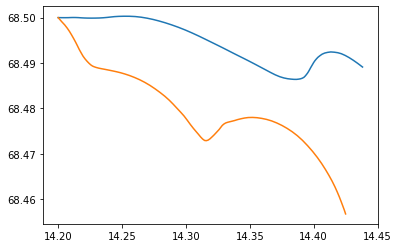

In [16]:
%matplotlib inline
from netCDF4 import Dataset

pfile = Dataset('example.nc')
t = pfile.variables['time'][0,:]
lon = np.ma.filled(pfile.variables['lon'], np.nan)
lat = np.ma.filled(pfile.variables['lat'], np.nan)
pfile.close()

print(lon[0].shape)
plt.plot(lon[0], lat[0])
plt.plot(lono[0], lato[0])

10:04:42 INFO: Opening dataset: /home/johanna/gpu-ocean/gpu_ocean/papers/MPI_SIR/netcdf_cache/NorFjords160/A10/norfjords_160m_his.nc4_2019071601-2019071700
10:04:42 INFO: Opening file with Dataset
10:04:42 INFO: 'gls_cmu0'
10:04:42 INFO: Did not find complete set of GLS parameters
10:04:42 INFO: Making Splines for lon,lat to x,y conversion...


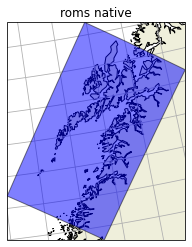

In [32]:
nordic_native = reader_ROMS_native.Reader(norfjords160)
nordic_native.plot()

In [ ]:
o.seed_elements(lon= lon, lat=lat, time=nordic_native.start_time)

o.run(duration = timedelta(hours=20), time_step = 300, time_step_output = 900)

In [ ]:
%matplotlib inline
o.plot(fast=True)

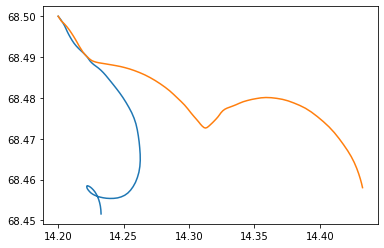

In [15]:
%matplotlib inline
from netCDF4 import Dataset

pfile = Dataset('example_wind.nc')
t = pfile.variables['time'][0,:]
lon_wind = np.ma.filled(pfile.variables['lon'], np.nan)
lat_wind = np.ma.filled(pfile.variables['lat'], np.nan)
pfile.close()

plt.plot(lon_wind[0], lat_wind[0])
plt.plot(lono_wind[0], lato_wind[0])

In [18]:
norf = Dataset(o.test_data_folder() +
    '2Feb2016_Nordic_sigma_3d/Nordic-4km_SLEVELS_avg_00_subset2Feb2016.nc')
for var in norf.variables:
    print(var, end= " ")
for var in norf.variables:
    print(var)
    var = norf.variables[var]
    print(var.shape)
    var_attr = var.ncattrs()
    for att in var_attr:
        print(att, ": ", var.__getattr__(att))
    print()
#print(a)
#print(a[0][1]-a[0][0], a[0][2]-a[0][1])
norf.close()

AICEnudass Akk_bak Akp_bak Akt_bak Akv_bak Charnok_alpha CrgBan_cw Cs_r Cs_w FSobc_in FSobc_out Falpha Fbeta Fgamma LtracerSrc M2nudg M2obc_in M2obc_out M3nudg M3obc_in M3obc_out Tcline Tnudg Tobc_in Tobc_out Vstretching Vtransform Znudg Zob Zos Zos_hsig_alpha aice angle dstart dt dtfast el f gamma2 gls_Kmin gls_Pmin gls_c1 gls_c2 gls_c3m gls_c3p gls_cmu0 gls_m gls_n gls_p gls_sigk gls_sigp h hc hice lat_psi lat_rho lat_u lat_v lon_psi lon_rho lon_u lon_v mask_psi mask_rho mask_u mask_v nAVG nHIS nRST nSTA ndefAVG ndefHIS ndtfast ntimes ntsAVG ocean_time pm pn rdrg rdrg2 rho0 s_rho s_w salt spherical swrad sz_alpha temp theta_b theta_s u ubar uice v vbar vice xl zeta zeta_detided AICEnudass
()
long_name :  Sea ice conc. nudging assimilation inverse time scale
units :  day-1
add_offset :  9.969209968386869e+36

Akk_bak
()
long_name :  background vertical mixing coefficient for turbulent energy
units :  meter2 second-1
add_offset :  5e-06

Akp_bak
()
long_name :  background vertical mixi